# Exploratory Data Analysis (EDA)
In this notebook, we will explore the credit risk dataset to understand its structure, identify data quality issues, and uncover patterns that will guide feature engineering.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

# Set display options for better readability
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1200)

In [3]:
# Load the dataset (update the filename as needed)
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Display the shape and info of the dataframe
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
df.info()

Number of rows: 95662
Number of columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       9566

## Summary Statistics
Let's examine the central tendency, dispersion, and distribution of the dataset using summary statistics for both numerical and categorical features.

In [5]:
# Summary statistics for numerical columns
df.describe().T

# Summary statistics for categorical columns
df.describe(include=['object', 'category']).T

,count,unique,top,freq
TransactionId,95662,95662,TransactionId_76871,1
BatchId,95662,94809,BatchId_67019,28
AccountId,95662,3633,AccountId_4841,30893
SubscriptionId,95662,3627,SubscriptionId_3829,32630
CustomerId,95662,3742,CustomerId_7343,4091
CurrencyCode,95662,1,UGX,95662
ProviderId,95662,6,ProviderId_4,38189
ProductId,95662,23,ProductId_6,32635
ProductCategory,95662,9,financial_services,45405
ChannelId,95662,4,ChannelId_3,56935


In [6]:
# Central tendency and dispersion for numerical columns
central_tendency = pd.DataFrame({
    'mean': df.mean(numeric_only=True),
    'median': df.median(numeric_only=True),
    'mode': df.mode(numeric_only=True).iloc[0],
    'std': df.std(numeric_only=True),
    'min': df.min(numeric_only=True),
    '25%': df.quantile(0.25, numeric_only=True),
    '50%': df.quantile(0.5, numeric_only=True),
    '75%': df.quantile(0.75, numeric_only=True),
    'max': df.max(numeric_only=True)
})
central_tendency

,mean,median,mode,std,min,25%,50%,75%,max
CountryCode,256.000000,256.0,256.0,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,6717.846433,1000.0,1000.0,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,9900.583941,1000.0,1000.0,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,2.255974,2.0,2.0,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,0.002018,0.0,0.0,0.044872,0.0,0.0,0.0,0.0,1.0


## Distribution of Numerical Features
Let's visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

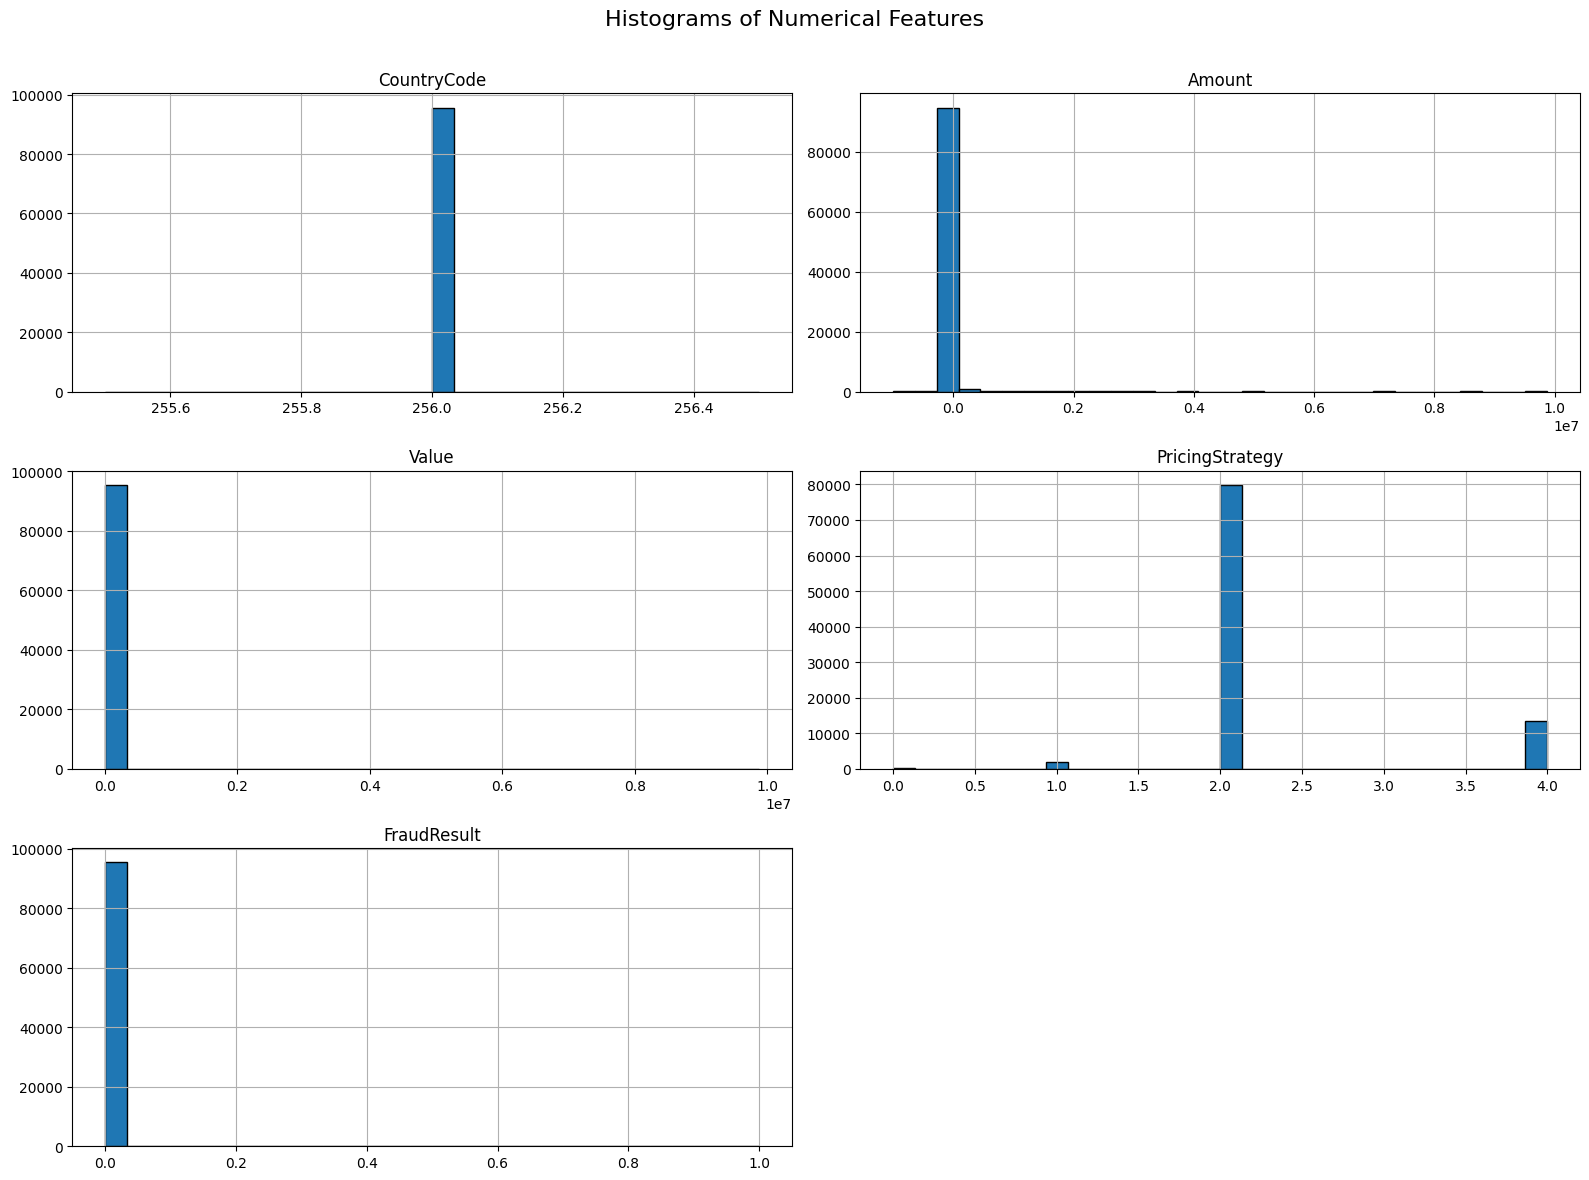

In [8]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical features
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.

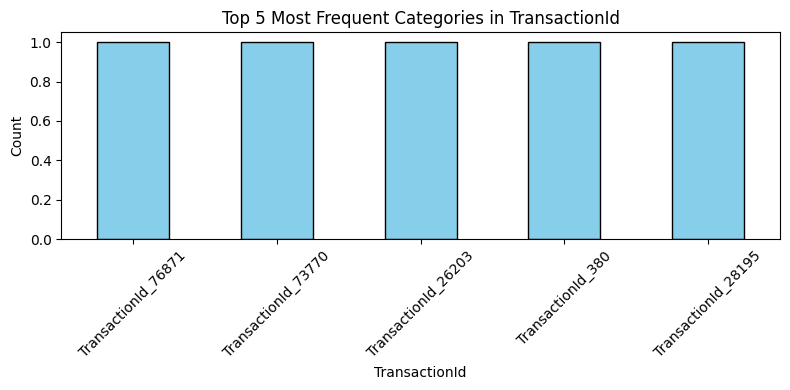

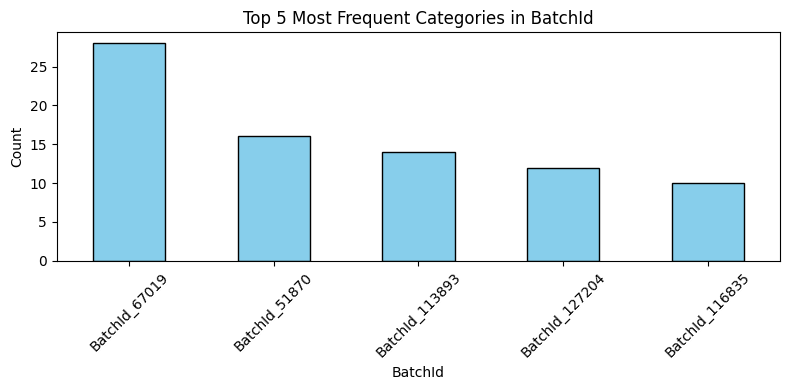

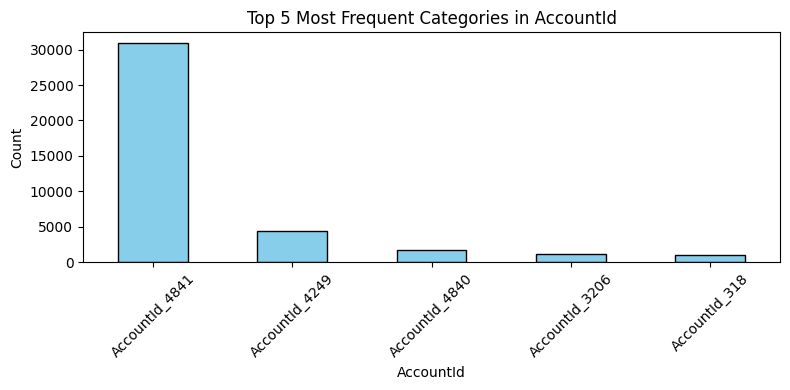

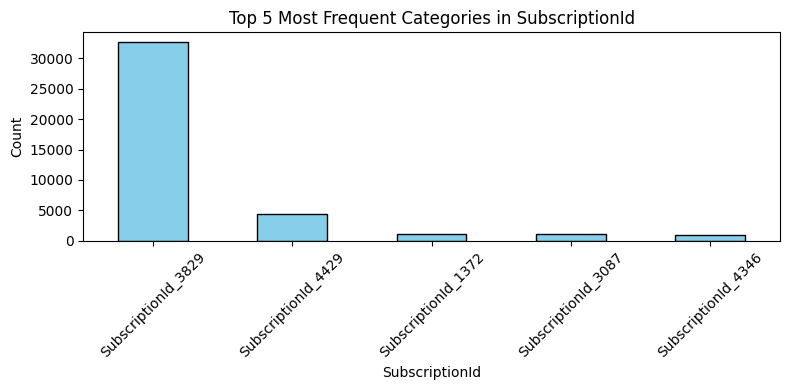

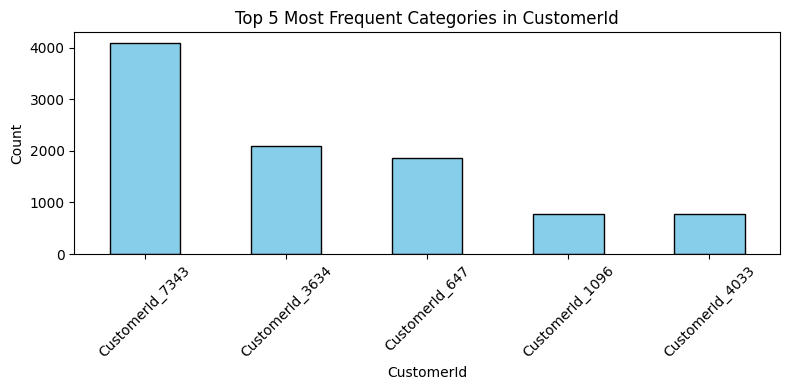

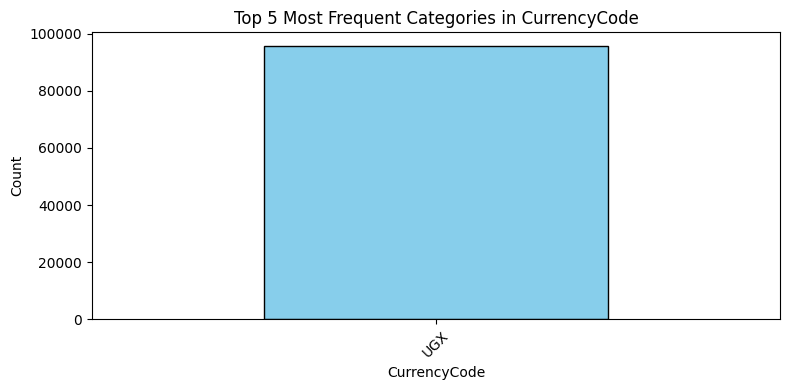

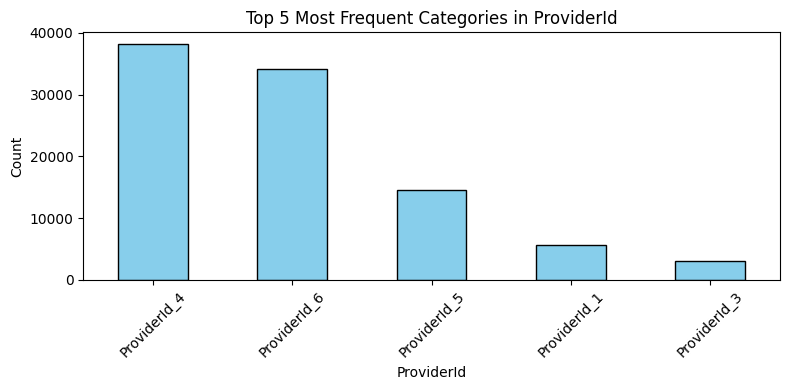

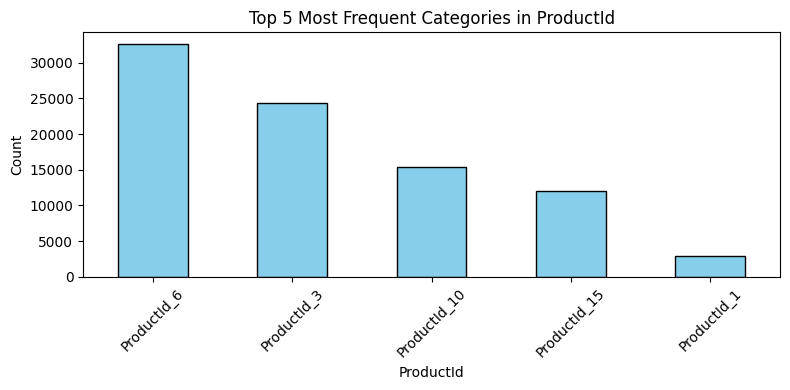

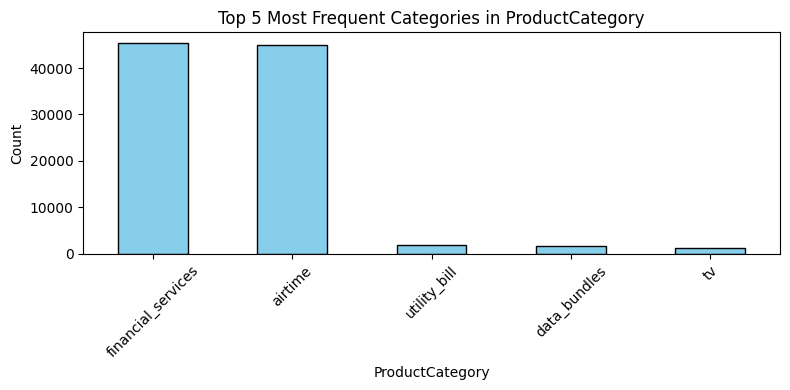

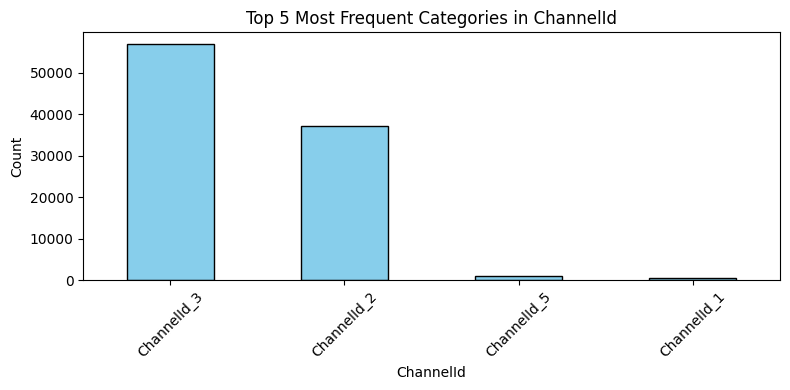

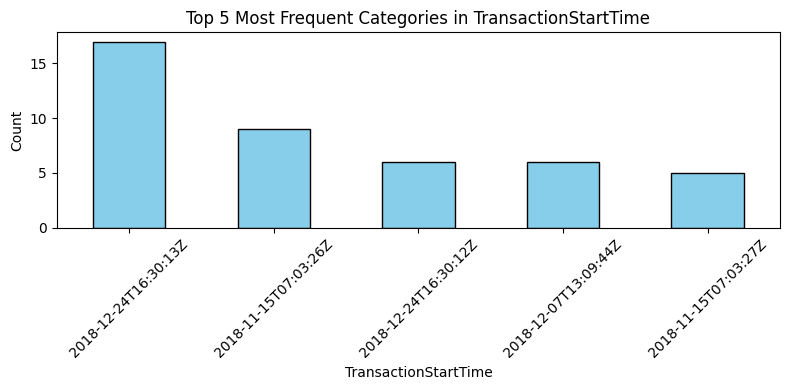

In [9]:
# Plot bar charts for categorical features
df_cat = df.select_dtypes(include=['object', 'category'])

for col in df_cat.columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().head(5).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Top 5 Most Frequent Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Correlation Analysis
Understanding the relationships between numerical features helps identify multicollinearity and potential predictors for modeling.

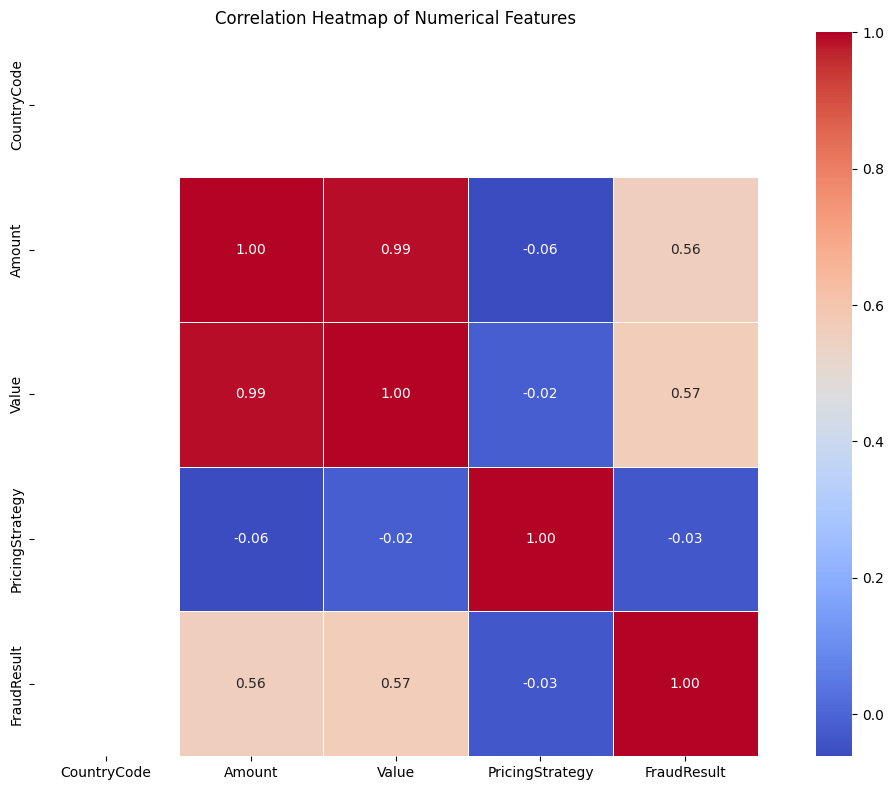

In [10]:
import seaborn as sns

# Compute correlation matrix for numerical features
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Identifying Missing Values
Identifying missing values is crucial for determining data quality and deciding on appropriate imputation strategies.

In [12]:
# Count and percentage of missing values for each column
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percent': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
missing_df

,Missing Count,Missing Percent


## Outlier Detection
Box plots are useful for visually identifying outliers in numerical features.

<Figure size 1600x800 with 0 Axes>

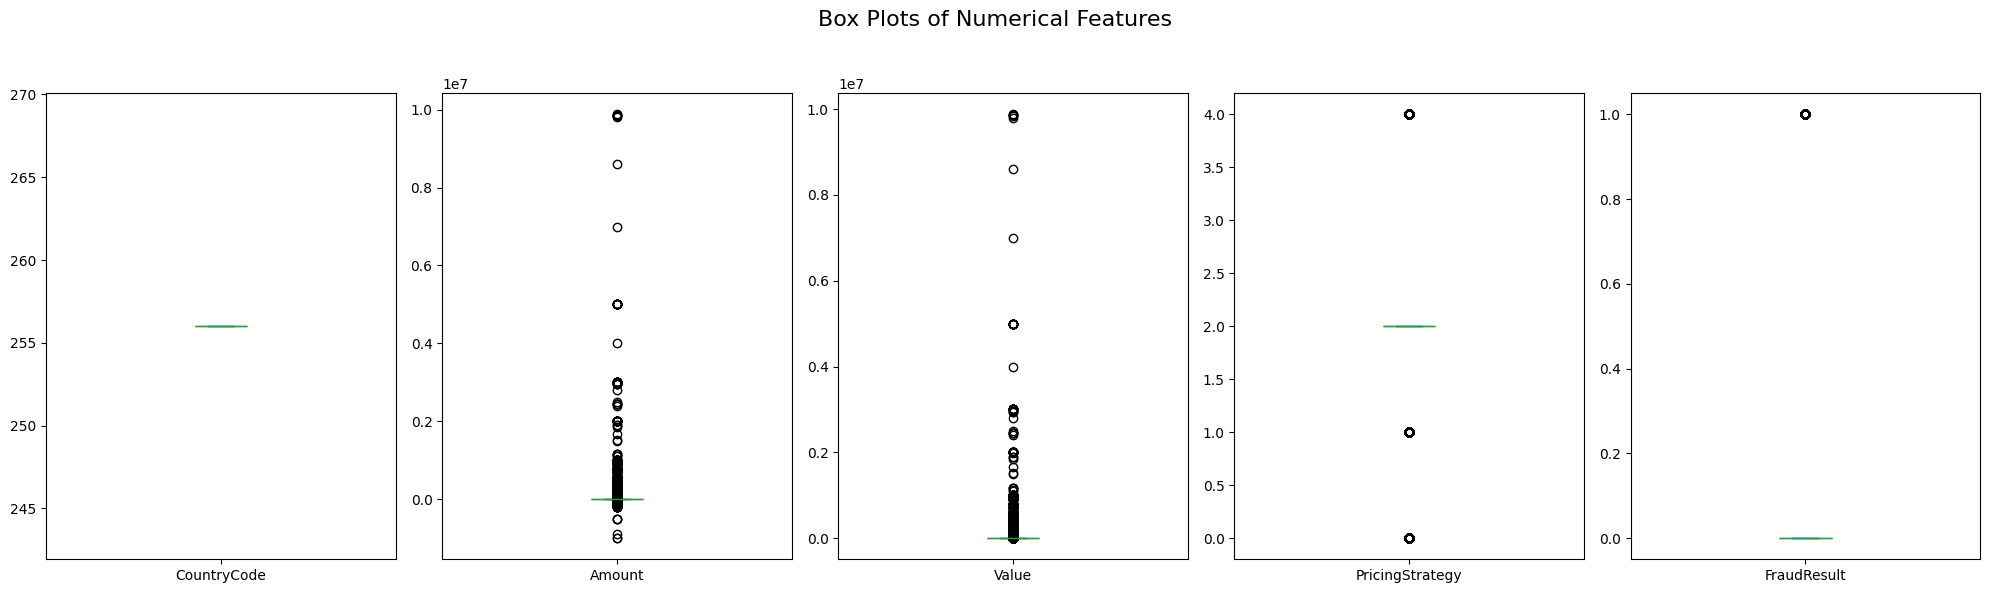

In [13]:
# Box plots for all numerical features
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 8))
df[num_cols].plot(kind='box', subplots=True, layout=(1, len(num_cols)), sharey=False, figsize=(4*len(num_cols), 6), patch_artist=True)
plt.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()